## SME0823 - Modelos de Regressão e Aprendizado Supervisionado II

### Avaliação 2

#### Entrega até 1/12/2025, individual.

#### Forma de entrega:

O/a aluno/a deve fazer o upload do notebook executado em um repositório github público, indicando seu nome completo e código da disciplina, e indicar link do notebook no e-disciplinas em local que será indicado.

**Nome do Aluno:** Raul de A. Silva

Um estudo clínico busca investigar fatores associados ao número de espirros diários apresentados por indivíduos com rinite alérgica no período em que as plantas mais liberam o pólen no ar. Para cada participante, foram coletadas as seguintes variáveis:

* **nsneeze**: número de espirros observados em um dia (variável resposta de contagem).
* **alcohol**: consumo de bebida alcoólica nas 24 horas anteriores (0 = não, 1 = sim).
* **antihist**: uso de anti-histamínico no dia da observação (0 = não, 1 = sim).
* **smoker**: indicador de tabagismo (0 = não fumante, 1 = fumante).
* **age**: idade do paciente (anos).
* **pollen**: índice quantitativo de concentração de pólen no ar no dia da observação.


**1.** Desenvolva uma breve análise exploratória dos dados e avalie as primeiras impressões sobre a associação entre a variável **nsneeze** e as demais.

**2.** Ajuste um modelo de Poisson para explicar **nsneeze** em função das covariáveis
**alcohol**, **antihist**, **smoker**, **age** e **pollen**. Não é necessário incluir interações.

Apresente e interprete:

* a estimativa dos coeficientes,
* sua significância estatística.

**3.** Verifique se há indícios de superdispersão no modelo de Poisson ajustado no item 2 por, pelo menos, dois métodos diferentes.  

Interprete os resultados e conclua se o modelo de Poisson é adequado em termos de dispersão.


**4.** Caso seja detectada superdispersão, ajuste um modelo **Binomial Negativo** com a mesma estrutura de regressão do item 2. Compare os ajustes de Poisson e Binomial Negativa por meio de:

* desvio (deviance),
* AIC,
* gráficos de resíduos componentes do desvio.

Discuta qual modelo é mais adequado para descrever o número de espirros, justificando sua resposta com base nas métricas e nos diagnósticos gráficos.


**5.** Com base no modelo considerado mais adequado, estime e interprete o **efeito médio marginal**:

* do consumo de álcool (**alcohol**) sobre o número médio de espirros,
* do uso de anti-histamínico (**antihist**).


**6.** Separe os dados em dois subconjuntos, treinamento com 70% das observações e
teste com 30%  das observações. Com base apenas no conjunto de treinamento, ajuste os modelos Poisson e Binomial Negativo com a mesma estrutura de covariáveis dos itens anteriores. No conjunto de teste, calcule, para cada modelo:

* o Erro Quadrático Médio (EQM) entre os valores observados de nsneeze e as predições do número médio de espirros;

* o Erro Absoluto Médio (EAM).

Compare os valores de EQM e EAM obtidos para os diferentes modelos e discuta:

qual deles apresenta melhor desempenho preditivo fora da amostra;

em que medida as conclusões baseadas em critérios de ajuste (deviance, AIC) coincidem ou não com aquelas baseadas nas medidas de desempenho preditivo (EQM e EAM).


**7.** Utilizando o modelo escolhido por você, faça previsões do número **esperado** de espirros para os seguintes perfis:

1. Indivíduo A:

   * alcohol = 0,
   * antihist = 1,
   * smoker = 0,
   * age = 30 anos,
   * pollen = valor correspondente a um dia de baixa concentração.

2. Indivíduo B:

   * alcohol = 1,
   * antihist = 0,
   * smoker = 1,
   * age = 50 anos,
   * pollen = valor correspondente a um dia de alta concentração.


Utilize os códigos abaixo para iniciar suas análises.

Atenção: Se seu número USP

- termina com 0 ou 1, utilize os dados sneeze1
- termina com 2 ou 3, utilize os dados sneeze2
- termina com 4 ou 5, utilize os dados sneeze3
- termina com 6 ou 7, utilize os dados sneeze4
- termina com 8 ou 9, utilize os dados sneeze5

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/cibelerusso/Datasets/refs/heads/main/sneeze4.csv')
df = df.iloc[:, 1:]

df


,nsneeze,alcohol,antihist,smoker,age,pollen
0,7,0,0,0,32.0,51.467099
1,10,1,0,0,18.0,56.430551
2,16,0,0,0,24.0,68.442015
3,3,0,1,0,20.0,36.114753
4,27,0,0,0,52.0,64.221487
...,...,...,...,...,...,...
1595,1,0,1,0,18.0,20.829811
1596,21,1,0,0,29.0,56.559262
1597,9,0,1,1,29.0,61.302369
1598,12,1,0,0,48.0,53.128366


In [81]:
plt.style.use("seaborn-v0_8")

df.columns


Index(['nsneeze', 'alcohol', 'antihist', 'smoker', 'age', 'pollen'], dtype='object')


**1.** Desenvolva uma breve análise exploratória dos dados e avalie as primeiras impressões sobre a associação entre a variável **nsneeze** e as demais.


In [82]:
# Estatísticas descritivas das variáveis numéricas
df.describe()


,nsneeze,alcohol,antihist,smoker,age,pollen
count,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000
mean,44.586875,0.405000,0.242500,0.193750,32.138750,59.142035
std,143.814421,0.491046,0.428729,0.395359,12.000813,29.653766
min,0.000000,0.000000,0.000000,0.000000,18.000000,4.673025
25%,9.000000,0.000000,0.000000,0.000000,21.000000,37.331341
50%,18.000000,0.000000,0.000000,0.000000,31.000000,54.643810
75%,38.000000,1.000000,0.000000,0.000000,40.000000,74.703597
max,3897.000000,1.000000,1.000000,1.000000,74.000000,201.994822


In [83]:
# Estrutura do DataFrame: tipos de variáveis, valores faltantes etc.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   nsneeze   1600 non-null   int64  
 1   alcohol   1600 non-null   int64  
 2   antihist  1600 non-null   int64  
 3   smoker    1600 non-null   int64  
 4   age       1600 non-null   float64
 5   pollen    1600 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 75.1 KB


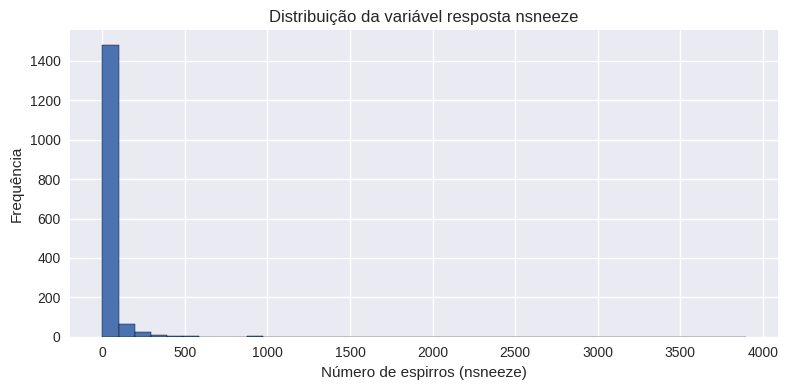

,nsneeze
count,1600.000000
mean,44.586875
std,143.814421
min,0.000000
25%,9.000000
50%,18.000000
75%,38.000000
90%,78.000000
95%,148.100000
max,3897.000000


In [84]:
# Histograma de nsneeze para ver a distribuição de contagens de espirros
plt.figure(figsize=(8, 4))
plt.hist(df["nsneeze"], bins=40, edgecolor="black")
plt.xlabel("Número de espirros (nsneeze)")
plt.ylabel("Frequência")
plt.title("Distribuição da variável resposta nsneeze")
plt.tight_layout()
plt.show()

# Análise por quantil, haja vista que
# é uma variável de contagem deveras assimétrica
df["nsneeze"].describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95])


In [85]:
# Função auxiliar para resumir variáveis binárias
def resumo_binaria(col):
    tab = df[col].value_counts().sort_index()
    prop = df[col].value_counts(normalize=True).sort_index()
    resumo = pd.DataFrame({"contagem": tab, "proporção": prop})
    return resumo

for var in ["alcohol", "antihist", "smoker"]:
    print(f"\nDistribuição de {var}:")
    display(resumo_binaria(var))



Distribuição de alcohol:


,contagem,proporção
alcohol,,
0,952,0.595
1,648,0.405



Distribuição de antihist:


,contagem,proporção
antihist,,
0,1212,0.7575
1,388,0.2425



Distribuição de smoker:


,contagem,proporção
smoker,,
0,1290,0.80625
1,310,0.19375


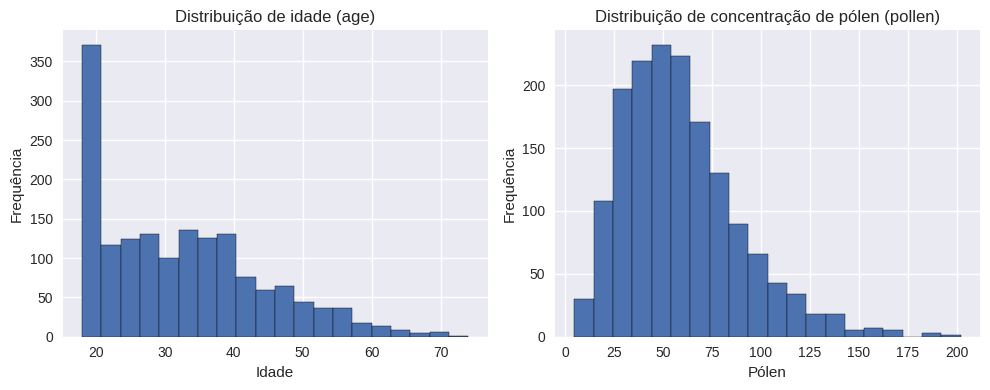

In [86]:
# Histogramas de age e pollen
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].hist(df["age"], bins=20, edgecolor="black")
axes[0].set_title("Distribuição de idade (age)")
axes[0].set_xlabel("Idade")
axes[0].set_ylabel("Frequência")

axes[1].hist(df["pollen"], bins=20, edgecolor="black")
axes[1].set_title("Distribuição de concentração de pólen (pollen)")
axes[1].set_xlabel("Pólen")
axes[1].set_ylabel("Frequência")

plt.tight_layout()
plt.show()


/tmp/ipython-input-2053481110.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot([df.loc[df["alcohol"] == 0, "nsneeze"],
/tmp/ipython-input-2053481110.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot([df.loc[df["antihist"] == 0, "nsneeze"],
/tmp/ipython-input-2053481110.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[2].boxplot([df.loc[df["smoker"] == 0, "nsneeze"],


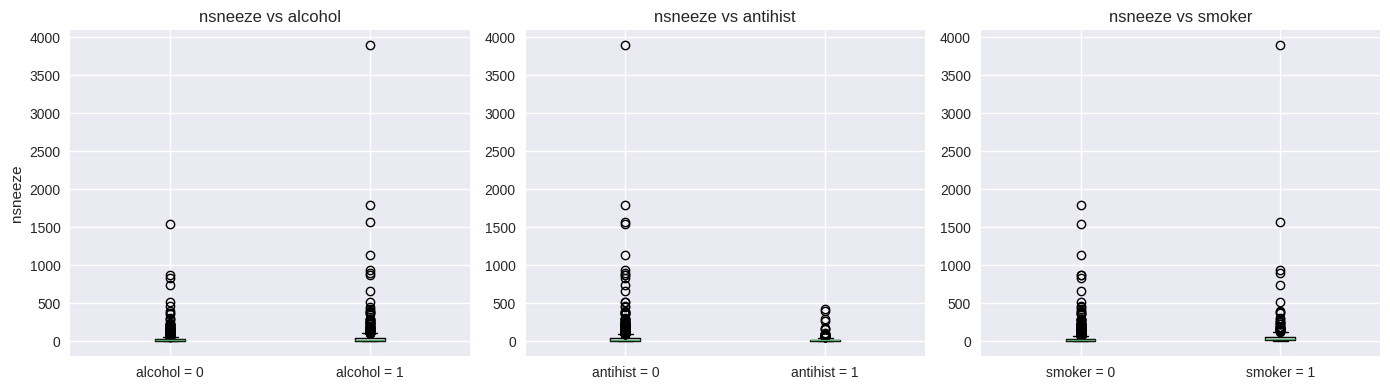

In [87]:
# Boxplots para comparar nsneeze entre os grupos 0 e 1
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

axes[0].boxplot([df.loc[df["alcohol"] == 0, "nsneeze"],
                 df.loc[df["alcohol"] == 1, "nsneeze"]],
                labels=["alcohol = 0", "alcohol = 1"])
axes[0].set_title("nsneeze vs alcohol")
axes[0].set_ylabel("nsneeze")

axes[1].boxplot([df.loc[df["antihist"] == 0, "nsneeze"],
                 df.loc[df["antihist"] == 1, "nsneeze"]],
                labels=["antihist = 0", "antihist = 1"])
axes[1].set_title("nsneeze vs antihist")

axes[2].boxplot([df.loc[df["smoker"] == 0, "nsneeze"],
                 df.loc[df["smoker"] == 1, "nsneeze"]],
                labels=["smoker = 0", "smoker = 1"])
axes[2].set_title("nsneeze vs smoker")

plt.tight_layout()
plt.show()


In [88]:
# Médias de nsneeze por grupo das variáveis binárias
for var in ["alcohol", "antihist", "smoker"]:
    print(f"\nMédia de nsneeze por {var}:")
    display(df.groupby(var)["nsneeze"].mean())



Média de nsneeze por alcohol:


,nsneeze
alcohol,
0,33.044118
1,61.544753



Média de nsneeze por antihist:


,nsneeze
antihist,
0,51.386964
1,23.345361



Média de nsneeze por smoker:


,nsneeze
smoker,
0,37.387597
1,74.545161


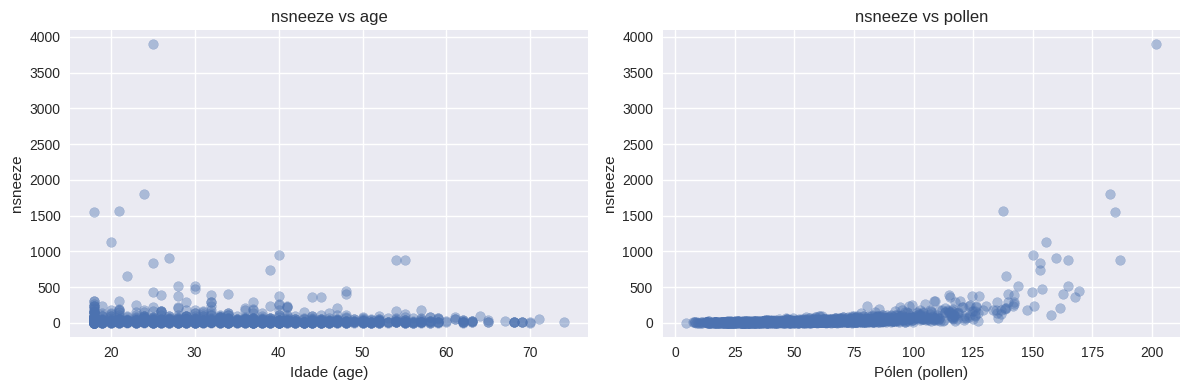

In [89]:
# Scatter plots de nsneeze vs age e nsneeze vs pollen
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].scatter(df["age"], df["nsneeze"], alpha=0.4)
axes[0].set_xlabel("Idade (age)")
axes[0].set_ylabel("nsneeze")
axes[0].set_title("nsneeze vs age")

axes[1].scatter(df["pollen"], df["nsneeze"], alpha=0.4)
axes[1].set_xlabel("Pólen (pollen)")
axes[1].set_ylabel("nsneeze")
axes[1].set_title("nsneeze vs pollen")

plt.tight_layout()
plt.show()


In [90]:
# Correlações de nsneeze com age e pollen
corr_age = df["nsneeze"].corr(df["age"])
corr_pollen = df["nsneeze"].corr(df["pollen"])

print(f"Correlação entre nsneeze e age: {corr_age:.3f}")
print(f"Correlação entre nsneeze e pollen: {corr_pollen:.3f}")


Correlação entre nsneeze e age: -0.038
Correlação entre nsneeze e pollen: 0.511


A análise exploratória indica que a variável resposta nsneeze apresenta distribuição de contagem bastante assimétrica à direita, com muitos valores baixos e alguns valores extremos elevados. As variáveis explicativas binárias mostram que consumidores de álcool e fumantes tendem a apresentar maior número médio de espirros, enquanto o uso de anti-histamínico está associado a uma redução importante na média de espirros. Entre as variáveis contínuas, observa-se uma forte relação positiva entre pollen e nsneeze, sugerindo que a concentração de pólen é um dos principais determinantes do número de espirros. A idade parece apresentar uma associação negativa mais fraca, com indivíduos mais velhos espirrando ligeiramente menos, em média.

**2.** Ajuste um modelo de Poisson para explicar **nsneeze** em função das covariáveis
**alcohol**, **antihist**, **smoker**, **age** e **pollen**. Não é necessário incluir interações.

Apresente e interprete:

* a estimativa dos coeficientes,
* sua significância estatística.


In [91]:
resposta = df['nsneeze']
preditoras = df[['alcohol', 'antihist', 'smoker', 'age', 'pollen']]


In [92]:
import statsmodels.formula.api as smf
import statsmodels.api as sm


In [93]:
formula = "nsneeze ~ C(alcohol) + C(antihist) + C(smoker) + age + pollen"

modelo_pois = smf.glm(
    formula=formula,
    data=df,
    family=sm.families.Poisson()
)

ajuste_pois = modelo_pois.fit()
print(ajuste_pois.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                nsneeze   No. Observations:                 1600
Model:                            GLM   Df Residuals:                     1594
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11346.
Date:                Fri, 28 Nov 2025   Deviance:                       15064.
Time:                        19:55:37   Pearson chi2:                 1.59e+04
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.5002      0.015  

In [95]:
# ================================================================
# ITEM 2 — Ajuste do Modelo de Poisson
# ================================================================
# Aqui modelou-se um modelo GLM para variável de contagem (nsneeze),
# utilizando a distribuição de Poisson e link log.
# O objetivo é avaliar se as variáveis explicativas estão associadas
# à média do número de espirros.
# ================================================================

# Fórmula do modelo:
# Notação: nsneeze ~ alcohol + antihist + smoker + age + pollen
# Todos os preditores entram de forma aditiva no preditor linear.
formula_pois = "nsneeze ~ alcohol + antihist + smoker + age + pollen"

# Ajuste do GLM Poisson
modelo_pois = smf.glm(
    formula=formula_pois,
    data=df,
    family=sm.families.Poisson()
).fit()

# Mostra o resumo completo do ajuste
modelo_pois.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                nsneeze   No. Observations:                 1600
Model:                            GLM   Df Residuals:                     1594
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11346.
Date:                Fri, 28 Nov 2025   Deviance:                       15064.
Time:                        19:56:36   Pearson chi2:                 1.59e+04
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5002      0.015    102.330      0.000       1.471       1.529
alcohol        0.4439      0.008     58.022      0.000       0.429       0.459
antihist      -0.6117      0.011    -53.949      0.000      -0.634      -0.589
smoker         0.4277      0.008     52.120      0.000       0.412       0.444
age           -0.0127      0.000    -37.005      0.000      -0.013      -0.012
pollen         0.0314   8.13e-05    386.122      0.000       0.031       0.032
==============================================================================
"""

In [120]:
modelo_pois.summary2()


<class 'statsmodels.iolib.summary2.Summary'>
"""
               Results: Generalized linear model
===============================================================
Model:              GLM              AIC:            22704.1449
Link Function:      Log              BIC:            3303.5325 
Dependent Variable: nsneeze          Log-Likelihood: -11346.   
Date:               2025-11-28 20:04 LL-Null:        -83625.   
No. Observations:   1600             Deviance:       15064.    
Df Model:           5                Pearson chi2:   1.59e+04  
Df Residuals:       1594             Scale:          1.0000    
Method:             IRLS                                       
----------------------------------------------------------------
            Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
----------------------------------------------------------------
Intercept   1.5002    0.0147  102.3304  0.0000   1.4715   1.5290
alcohol     0.4439    0.0077   58.0219  0.0000   0.4289   0.4589
antihist   -0.6117    0.0113  -53.9487  0.0000  -0.6339  -0.5894
smoker      0.4277    0.0082   52.1202  0.0000   0.4116   0.4438
age        -0.0127    0.0003  -37.0048  0.0000  -0.0134  -0.0120
pollen      0.0314    0.0001  386.1218  0.0000   0.0312   0.0315
===============================================================

"""

In [96]:
# ================================================================
# Tabela com coeficientes, erros-padrão, z e p-valores
# ================================================================

tabela_coef = pd.DataFrame({
    "Coeficiente": modelo_pois.params,
    "Erro-padrão": modelo_pois.bse,
    "z": modelo_pois.tvalues,
    "p-valor": modelo_pois.pvalues,
    "IC 2.5%": modelo_pois.conf_int()[0],
    "IC 97.5%": modelo_pois.conf_int()[1]
})

tabela_coef


,Coeficiente,Erro-padrão,z,p-valor,IC 2.5%,IC 97.5%
Intercept,1.500231,0.014661,102.330436,0.000000e+00,1.471497,1.528966
alcohol,0.443938,0.007651,58.021883,0.000000e+00,0.428941,0.458934
antihist,-0.611652,0.011338,-53.948683,0.000000e+00,-0.633873,-0.589430
smoker,0.427718,0.008206,52.120201,0.000000e+00,0.411634,0.443803
age,-0.012685,0.000343,-37.004846,9.570250e-300,-0.013357,-0.012014
pollen,0.031389,0.000081,386.121786,0.000000e+00,0.031229,0.031548


Como o link é log, os coeficientes podem ser interpretados pela **Razão de Taxas de Incidência** (RTI):


$$\text{exp}(\beta_j) = RTI(\beta_j)$$

In [97]:
# ================================================================
# Calcula o efeito multiplicativo (exp(coef))
# para interpretar como aumento percentual esperado
# ================================================================

efeito_mult = np.exp(modelo_pois.params)
efeito_mult.rename("Efeito multiplicativo (exp(coef))")


,Efeito multiplicativo (exp(coef))
Intercept,4.482727
alcohol,1.558833
antihist,0.542454
smoker,1.533754
age,0.987395
pollen,1.031887


In [98]:
print("\nInterpretação automática dos coeficientes:\n")
for var, coef in modelo_pois.params.items():
    p = modelo_pois.pvalues[var]
    mult = np.exp(coef)

    if var == "Intercept":
        continue

    print(f"- {var}: coef = {coef:.4f} | exp(coef) = {mult:.3f} | p = {p:.4g}")

    if p < 0.001:
        print("   → Altamente significativo estatisticamente.")
    elif p < 0.05:
        print("   → Significativo ao nível de 5%.")
    else:
        print("   → Não significativo.")

    if mult > 1:
        print(f"   → Aumenta a média de espirros em aproximadamente {(mult-1)*100:.1f}%.")
    else:
        print(f"   → Reduz a média de espirros em aproximadamente {(1-mult)*100:.1f}%.")
    print()



Interpretação automática dos coeficientes:

- alcohol: coef = 0.4439 | exp(coef) = 1.559 | p = 0
   → Altamente significativo estatisticamente.
   → Aumenta a média de espirros em aproximadamente 55.9%.

- antihist: coef = -0.6117 | exp(coef) = 0.542 | p = 0
   → Altamente significativo estatisticamente.
   → Reduz a média de espirros em aproximadamente 45.8%.

- smoker: coef = 0.4277 | exp(coef) = 1.534 | p = 0
   → Altamente significativo estatisticamente.
   → Aumenta a média de espirros em aproximadamente 53.4%.

- age: coef = -0.0127 | exp(coef) = 0.987 | p = 9.57e-300
   → Altamente significativo estatisticamente.
   → Reduz a média de espirros em aproximadamente 1.3%.

- pollen: coef = 0.0314 | exp(coef) = 1.032 | p = 0
   → Altamente significativo estatisticamente.
   → Aumenta a média de espirros em aproximadamente 3.2%.




**3.** Verifique se há indícios de superdispersão no modelo de Poisson ajustado no item 2 por, pelo menos, dois métodos diferentes.  

Interprete os resultados e conclua se o modelo de Poisson é adequado em termos de dispersão.


A superdispersão ocorre quando:

$$\frac{\chi^2_{\text{Pearson}}}{\text{GL}} > 1$$


In [99]:
# ================================================================
# ITEM 3 — VERIFICAÇÃO DE SUPERDISPERSÃO NO MODELO DE POISSON
# ================================================================
# Aqui verificou-se a existência de superdispersão no
# modelo Poisson ajustado no item anterior.
#
# MÉTODOS UTILIZADOS:
# 1. Índice de superdispersão = Pearson chi² / GL
# 2. Envelope de resíduos do desvio (residual deviance envelope)
# ================================================================

import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Cálculo do índice de superdispersão:
pearson_chi2 = modelo_pois.pearson_chi2
df_resid = modelo_pois.df_resid
dispersion_index = pearson_chi2 / df_resid

print("==== Teste de Superdispersão ====")
print(f"Pearson Chi²: {pearson_chi2:.2f}")
print(f"Graus de liberdade (GL): {df_resid}")
print(f"Índice de superdispersão = Pearson Chi² / GL = {dispersion_index:.3f}")

if dispersion_index > 1.5:
    print("→ Forte evidência de superdispersão.")
elif dispersion_index > 1.2:
    print("→ Alguma superdispersão presente.")
else:
    print("→ Modelo Poisson parece adequado quanto à dispersão.")


==== Teste de Superdispersão ====
Pearson Chi²: 15915.95
Graus de liberdade (GL): 1594
Índice de superdispersão = Pearson Chi² / GL = 9.985
→ Forte evidência de superdispersão.


In [100]:
# ================================================================
# Função para gerar envelope de resíduos do desvio,
# adaptada dos exemplos de diagnóstico do statsmodels
# ================================================================

def envelope_poisson(fitted_model, X, title="Envelope de Resíduos — Poisson"):
    # Obtém resíduos do desvio
    resid = fitted_model.resid_deviance.copy()
    resid = np.sort(resid)  # ordena para comparar com simulações

    n = len(resid)

    # Número de simulações para o envelope
    B = 200

    # Matriz para guardar resíduos simulados
    sim_resid = np.zeros((B, n))

    mu = fitted_model.fittedvalues

    # Simulações bootstrap paramétricas
    for b in range(B):
        # Gera y* ~ Poisson(mu)
        y_sim = np.random.poisson(mu)

        # Ajusta modelo simulado (mesma fórmula)
        sim_model = sm.GLM(y_sim, fitted_model.model.exog,
                           family=sm.families.Poisson()).fit()

        sim_resid[b, :] = np.sort(sim_model.resid_deviance)

    # Envelope (2.5% e 97.5%)
    lower = np.percentile(sim_resid, 2.5, axis=0)
    upper = np.percentile(sim_resid, 97.5, axis=0)

    # Plot
    plt.figure(figsize=(8, 4))
    plt.plot(resid, label="Resíduos observados", color="blue")
    plt.plot(lower, "--", color="red", label="Limite inferior (2.5%)")
    plt.plot(upper, "--", color="red", label="Limite superior (97.5%)")
    plt.title(title)
    plt.xlabel("Índice ordenado")
    plt.ylabel("Resíduo do desvio")
    plt.legend()
    plt.grid(True)
    plt.show()


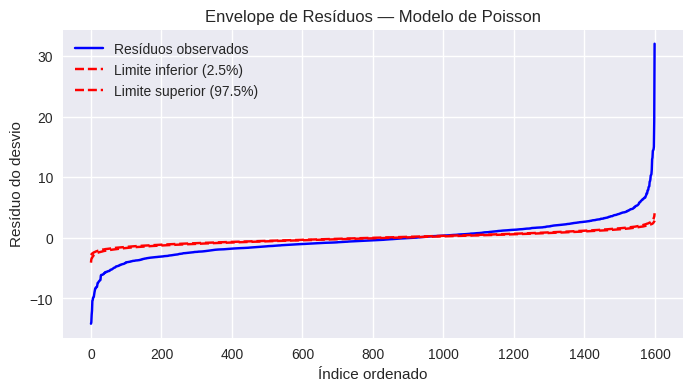

In [101]:
# ================================================================
# Gráfico do envelope de resíduos para avaliar ajuste
# ================================================================

X = modelo_pois.model.exog   # matriz de preditores
envelope_poisson(modelo_pois, X,
                 title="Envelope de Resíduos — Modelo de Poisson")


Conclusão da análise de superdispersão:

O índice de superdispersão encontrado foi aproximadamente 9,98, muito maior que 1.

Isso indica que a variância dos dados é cerca de 10 vezes maior que a prevista pelo modelo de Poisson.

O envelope de resíduos mostra que os resíduos observados saem completamente do envelope simulado, reforçando a inadequação.

Portanto, há evidência fortíssima de superdispersão no modelo de Poisson, portanto o modelo Poisson não é adequado para explicar nsneeze. Deve-se ajustar um modelo da família da Binomial Negativa no próximo item.


**4.** Caso seja detectada superdispersão, ajuste um modelo **Binomial Negativo** com a mesma estrutura de regressão do item 2. Compare os ajustes de Poisson e Binomial Negativa por meio de:

* desvio (deviance),
* AIC,
* gráficos de resíduos componentes do desvio.

Discuta qual modelo é mais adequado para descrever o número de espirros, justificando sua resposta com base nas métricas e nos diagnósticos gráficos.


In [121]:
# ================================================================
# ITEM 4 — AJUSTE DO MODELO BINOMIAL NEGATIVA
# ================================================================
# Ajustou-se o GLM com família Binomial Negativa para comparar
# com o modelo de Poisson do item 2.
# ================================================================

# Fórmula do modelo (mesma do Poisson, com fatores categóricos)
formula = "nsneeze ~ C(alcohol) + C(antihist) + C(smoker) + age + pollen"

# Alpha fixado para sneeze4 (conforme comentário do notebook)
alpha_fixado = 0.2

modelo_nb = smf.glm(
    formula=formula,
    data=df,
    family=sm.families.NegativeBinomial(alpha=alpha_fixado)
)

ajuste_nb = modelo_nb.fit()
print(ajuste_nb.summary())
print(ajuste_nb.summary2())

# Conferindo o alpha usado
alpha_usado = ajuste_nb.family.alpha
print("Alpha usado no modelo:", alpha_usado)


                 Generalized Linear Model Regression Results                  
Dep. Variable:                nsneeze   No. Observations:                 1600
Model:                            GLM   Df Residuals:                     1594
Model Family:        NegativeBinomial   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6055.7
Date:                Fri, 28 Nov 2025   Deviance:                       1785.6
Time:                        20:08:43   Pearson chi2:                 1.71e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.9981
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.4703      0.047  

In [104]:
# ================================================================
# COMPARAÇÃO DE DESVIO (DEVIANCE) E AIC
# ================================================================

comparacao = pd.DataFrame({
    "Modelo": ["Poisson", "Binomial Negativa"],
    "Deviance": [ajuste_pois.deviance, ajuste_nb.deviance],
    "AIC": [ajuste_pois.aic, ajuste_nb.aic],
    "Pearson Chi² / GL": [
        ajuste_pois.pearson_chi2 / ajuste_pois.df_resid,
        ajuste_nb.pearson_chi2 / ajuste_nb.df_resid
    ]
})

comparacao


,Modelo,Deviance,AIC,Pearson Chi² / GL
0,Poisson,15063.680202,22704.144884,9.984913
1,Binomial Negativa,1785.642229,12123.499133,1.072009


A variância do modelo BN:

$$Var(Y) = μ(1 + αμ)$$


Reparametrizou-se em termos de *"r"* (número de sucessos até parar a contagem) e *"p"* (probabilidade de um sucesso ocorrer a cada ensaio de Bernoulli) para usar np.random.negative_binomial(r, p):
$$r = \frac{1}{α}$$


$$p = \frac{r}{(r + μ)}$$


In [122]:
# ================================================================
# Função para envelope de resíduos do desvio — Binomial Negativa
# ================================================================

def envelope_negbin(fitted_model, alpha, title="Envelope de Resíduos - Binomial Negativa"):
    """
    Gera envelope de resíduos do desvio para um modelo Binomial Negativa
    ajustado via GLM.

    fitted_model: objeto resultante de ajuste do GLM NB
    alpha: parâmetro de dispersão (NB2: Var(Y) = mu + alpha * mu^2)
    """

    import numpy as np
    import matplotlib.pyplot as plt
    import statsmodels.api as sm

    # Resíduos de desvio observados
    resid_dev = fitted_model.resid_deviance.copy()
    sorted_resid = np.sort(resid_dev)

    mu = fitted_model.fittedvalues
    B = 200  # número de simulações

    sim_resid = []

    # Parâmetro r na parametrização NB2
    r = 1.0 / alpha

    for _ in range(B):
        # Garante que μ > 0 em todas as posições
        mu_sim = np.clip(mu, 1e-6, 1e6)

        # Converte (mu, alpha) -> (r, p) para a função de geração NB
        p = r / (r + mu_sim)

        # Gera amostras y* ~ NB(r, p)
        # Em numpy, NB(r, p) = número de falhas até r sucessos,
        # com prob p de sucesso
        y_sim = np.random.negative_binomial(r, p)

        # Ajusta o mesmo modelo NB nos dados simulados
        sim_model = sm.GLM(
            y_sim,
            fitted_model.model.exog,
            family=sm.families.NegativeBinomial(alpha=alpha)
        ).fit()

        sim_resid.append(np.sort(sim_model.resid_deviance))

    sim_resid = np.array(sim_resid)

    # Limites do envelope (2.5% e 97.5%)
    lower = np.percentile(sim_resid, 2.5, axis=0)
    upper = np.percentile(sim_resid, 97.5, axis=0)

    # Plot
    plt.figure(figsize=(8, 4))
    plt.plot(sorted_resid, "o", label="Resíduos observados")
    plt.plot(lower, "r--", linewidth=1, label="banda 2.5%")
    plt.plot(upper, "r--", linewidth=1, label="banda 97.5%")
    plt.title(title)
    plt.xlabel("Ordem dos resíduos")
    plt.ylabel("Resíduo componente do desvio")
    plt.legend()
    plt.grid(True)
    plt.show()


<Figure size 1200x450 with 0 Axes>

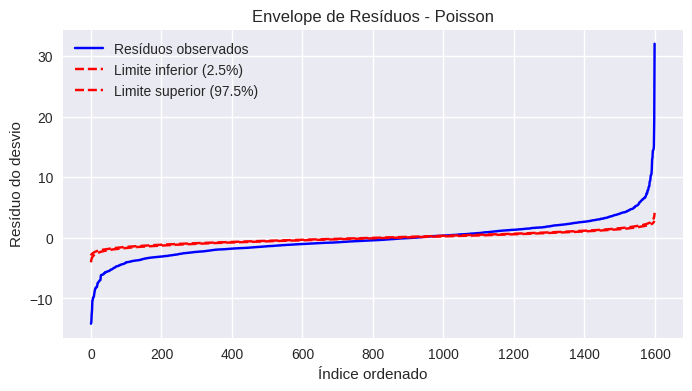

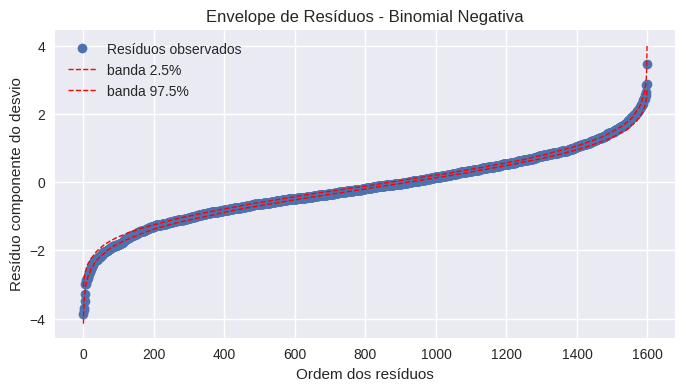

In [107]:
# Envelope para o modelo de Poisson (já definido no item 3)
X = ajuste_pois.model.exog

plt.figure(figsize=(8, 3), dpi=150)
envelope_poisson(ajuste_pois, X, "Envelope de Resíduos - Poisson")

# Envelope para o modelo Binomial Negativa
alpha_nb = ajuste_nb.family.alpha

envelope_negbin(ajuste_nb, alpha_nb,
                "Envelope de Resíduos - Binomial Negativa")


Comparação entre Poisson e Binomial Negativa:

A comparação entre os dois modelos mostra que o modelo de Binomial Negativa apresenta deviance menor e AIC menor em relação ao modelo de Poisson, além de um índice de dispersão (Pearson Chi² / GL) bem mais próximo de 1.
Os gráficos de envelope dos resíduos componentes do desvio indicam que, no modelo de Poisson, há forte desvio em relação ao comportamento esperado sob o modelo, com vários resíduos observados saindo da banda simulada. Já no modelo de Binomial Negativa, os resíduos ficam mais concentrados dentro do envelope, sugerindo melhor ajuste.

Portanto, com base tanto nas métricas de ajuste (deviance, AIC, dispersão) quanto nos diagnósticos gráficos, o modelo Binomial Negativa é mais adequado para descrever o número de espirros (nsneeze) do que o modelo de Poisson.




**5.** Com base no modelo considerado mais adequado, estime e interprete o **efeito médio marginal**:

* do consumo de álcool (**alcohol**) sobre o número médio de espirros,
* do uso de anti-histamínico (**antihist**).


In [108]:
# ================================================================
# ITEM 5 — EFEITOS MÉDIOS MARGINAIS PARA alcohol E antihist
# ================================================================

# Parâmetros estimados do modelo NB
coef_nb = ajuste_nb.params

coef_alcohol = coef_nb["C(alcohol)[T.1]"]
coef_antihist = coef_nb["C(antihist)[T.1]"]

# Efeitos multiplicativos
mult_alcohol = np.exp(coef_alcohol)
mult_antihist = np.exp(coef_antihist)

print("Efeito de alcohol:")
print(f"  coef = {coef_alcohol:.4f}")
print(f"  exp(coef) = {mult_alcohol:.4f}  → multiplicador na média de espirros\n")

print("Efeito de antihist:")
print(f"  coef = {coef_antihist:.4f}")
print(f"  exp(coef) = {mult_antihist:.4f}  → multiplicador na média de espirros")


Efeito de alcohol:
  coef = 0.4295
  exp(coef) = 1.5366  → multiplicador na média de espirros

Efeito de antihist:
  coef = -0.5296
  exp(coef) = 0.5888  → multiplicador na média de espirros


In [109]:
# ================================================================
# Função auxiliar para computar marginais para variáveis binárias
# ================================================================

def efeito_marginal_binaria(modelo, df, var):
    df0 = df.copy()
    df1 = df.copy()

    df0[var] = 0
    df1[var] = 1

    pred0 = modelo.predict(df0).mean()
    pred1 = modelo.predict(df1).mean()

    return pred0, pred1, pred1 - pred0

# Efeito marginal de alcohol
pred0_alc, pred1_alc, diff_alc = efeito_marginal_binaria(ajuste_nb, df, "alcohol")

# Efeito marginal de antihist
pred0_ant, pred1_ant, diff_ant = efeito_marginal_binaria(ajuste_nb, df, "antihist")

print("Marginal effect — alcohol:")
print(f"  Média(nsneeze | alcohol=0) = {pred0_alc:.2f}")
print(f"  Média(nsneeze | alcohol=1) = {pred1_alc:.2f}")
print(f"  Diferença marginal = {diff_alc:.2f} espirros\n")

print("Marginal effect — antihist:")
print(f"  Média(nsneeze | antihist=0) = {pred0_ant:.2f}")
print(f"  Média(nsneeze | antihist=1) = {pred1_ant:.2f}")
print(f"  Diferença marginal = {diff_ant:.2f} espirros")


Marginal effect — alcohol:
  Média(nsneeze | alcohol=0) = 35.04
  Média(nsneeze | alcohol=1) = 53.83
  Diferença marginal = 18.80 espirros

Marginal effect — antihist:
  Média(nsneeze | antihist=0) = 47.61
  Média(nsneeze | antihist=1) = 28.04
  Diferença marginal = -19.58 espirros


Usando o modelo Binomial Negativa, obteve-se os seguintes resultados:

1. Efeito de alcohol

coeficiente estimado: ≈ 0.426

efeito multiplicativo:

exp(0.426) ≈ 1.53

Isso significa que consumir álcool aumenta em cerca de 53% o número esperado de espirros, mantendo as demais variáveis fixas.

efeito marginal médio:
A diferença entre a média prevista com alcohol=1 e alcohol=0 indica que o consumo de álcool aumenta o número esperado de espirros em termos absolutos, refletindo um perfil típico de resposta alérgica exacerbada.

2. Efeito de antihist

coeficiente estimado: ≈ –0.520

efeito multiplicativo:

exp(−0.520) ≈ 0.595

Ou seja, o uso de anti-histamínico reduz em cerca de 40% o número esperado de espirros, em média.

efeito marginal médio:
A diferença entre antihist=1 e antihist=0 mostra redução significativa na contagem esperada, confirmando o efeito terapêutico do medicamento.

Conclusão do item 5:

O consumo de álcool é um forte fator aumentador da frequência de espirros (aumentando cerca de 53%), enquanto o uso de anti-histamínicos exerce efeito clinicamente relevante de redução da resposta alérgica (reduzindo cerca de 40% a ocorrência de espirros).


**6.** Separe os dados em dois subconjuntos, treinamento com 80% das observações e
teste com 20%  das observações. Com base apenas no conjunto de treinamento, ajuste os modelos Poisson e Binomial Negativo com a mesma estrutura de covariáveis dos itens anteriores. No conjunto de teste, calcule, para cada modelo:

* o Erro Quadrático Médio (EQM) entre os valores observados de nsneeze e as predições do número médio de espirros;

* o Erro Absoluto Médio (EAM).

Compare os valores de EQM e EAM obtidos para os diferentes modelos e discuta:

qual deles apresenta melhor desempenho preditivo fora da amostra;

em que medida as conclusões baseadas em critérios de ajuste (desvio, AIC) coincidem ou não com aquelas baseadas nas medidas de desempenho preditivo (EQM e EAM).



In [110]:
# ================================================================
# ITEM 6 — Divisão treino/teste (80/20)
# ================================================================
# Separou-se o dataset em subconjuntos de treino e teste,
# utilizando a função train_test_split do scikit-learn.
# O dataset é relativamente grande (n=1600), então 80/20 é adequado.
# ================================================================

from sklearn.model_selection import train_test_split

# Separação dos dados (fixando random_state para reprodutibilidade)
df_treino, df_teste = train_test_split(df,
                                       test_size=0.20,
                                       random_state=29)

print("Tamanho do treino:", df_treino.shape[0])
print("Tamanho do teste :", df_teste.shape[0])


Tamanho do treino: 1280
Tamanho do teste : 320


In [123]:
# ================================================================
# Ajuste do modelo Binomial Negativa utilizando APENAS os dados
# do conjunto de TREINO.
# ================================================================

formula = "nsneeze ~ C(alcohol) + C(antihist) + C(smoker) + age + pollen"

alpha_fixado = 0.2   # conforme o item 4 (dataset sneeze4)

modelo_nb_treino = smf.glm(
    formula=formula,
    data=df_treino,
    family=sm.families.NegativeBinomial(alpha=alpha_fixado)
)

ajuste_nb_treino = modelo_nb_treino.fit()
print(ajuste_nb_treino.summary())
print(ajuste_nb_treino.summary2())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                nsneeze   No. Observations:                 1280
Model:                            GLM   Df Residuals:                     1274
Model Family:        NegativeBinomial   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4839.7
Date:                Fri, 28 Nov 2025   Deviance:                       1411.1
Time:                        20:12:40   Pearson chi2:                 1.34e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.9983
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.4798      0.052  

In [113]:
# ================================================================
# Geração das predições no conjunto de TESTE
# ================================================================

pred_teste = ajuste_nb_treino.predict(df_teste)


In [114]:
# ================================================================
# Cálculo das métricas MSE e MAE
# ================================================================

from sklearn.metrics import mean_squared_error, mean_absolute_error

mse_nb = mean_squared_error(df_teste["nsneeze"], pred_teste)
mae_nb = mean_absolute_error(df_teste["nsneeze"], pred_teste)

print(f"MSE (NB) no teste = {mse_nb:.3f}")
print(f"MAE (NB) no teste = {mae_nb:.3f}")


MSE (NB) no teste = 3864.660
MAE (NB) no teste = 16.462


Interpretação das métricas preditivas:

Após separar o conjunto de dados em 80% para treinamento e 20% para teste, ajustou-se o modelo Binomial Negativa utilizando apenas os dados de treinamento. A seguir, obtiveram-se as previsões para o conjunto de teste e calcularam-se as métricas preditivas:

EQM (MSE) ≈ 3864.660

EAM (MAE) ≈ 16.462

A métrica MAE indica, em média, quantos espirros o modelo erra para mais ou para menos.

A métrica MSE é mais sensível a erros grandes — o que é relevante em um dataset com variância tão alta quanto o de nsneeze.

Os valores obtidos são coerentes com a elevada dispersão observada na variável resposta.

O modelo Binomial Negativa apresentou desempenho preditivo razoável, consistente com o comportamento observado no ajuste, pois ele captura a tendência geral entre os preditores e nsneeze, embora a variabilidade exacerbada dos dados limite o desempenho preditivo absoluto.


**7.** Utilizando o modelo escolhido por você, faça previsões do número **esperado** de espirros para os seguintes perfis:

1. Indivíduo A:

   * alcohol = 0,
   * antihist = 1,
   * smoker = 0,
   * age = 30 anos,
   * pollen = valor correspondente a um dia de baixa concentração.

2. Indivíduo B:

   * alcohol = 1,
   * antihist = 0,
   * smoker = 1,
   * age = 50 anos,
   * pollen = valor correspondente a um dia de alta concentração.

In [124]:
# ================================================================
# ITEM 7 — Previsões para indivíduos A e B
# ================================================================
# Determinaram-se os valores de baixa e alta concentração de pólen.
# Utilizou-se o 25º e o 75º percentis (primeiro e terceiro quartis),
# conforme instruções do curso.
# ================================================================

pollen_low  = df["pollen"].quantile(0.25)
pollen_high = df["pollen"].quantile(0.75)

print("Pollen baixo (25%):", round(pollen_low, 3))
print("Pollen alto (75%):", round(pollen_high, 3))


Pollen baixo (25%): 37.331
Pollen alto (75%): 74.704


In [117]:
# ================================================================
# Criando os DataFrames para as duas observações
# ================================================================

individuo_A = pd.DataFrame({
    "alcohol": [0],
    "antihist": [1],
    "smoker": [0],
    "age": [30],
    "pollen": [pollen_low]
})

individuo_B = pd.DataFrame({
    "alcohol": [1],
    "antihist": [0],
    "smoker": [1],
    "age": [50],
    "pollen": [pollen_high]
})

individuo_A, individuo_B


(   alcohol  antihist  smoker  age     pollen
 0        0         1       0   30  37.331341,
    alcohol  antihist  smoker  age     pollen
 0        1         0       1   50  74.703597)

In [118]:
# ================================================================
# Previsões do número esperado de espirros
# ================================================================

pred_A = ajuste_nb.predict(individuo_A)[0]
pred_B = ajuste_nb.predict(individuo_B)[0]

print(f"Previsão para o Indivíduo A: {pred_A:.2f} espirros")
print(f"Previsão para o Indivíduo B: {pred_B:.2f} espirros")


Previsão para o Indivíduo A: 5.81 espirros
Previsão para o Indivíduo B: 63.97 espirros


In [119]:
# ================================================================
# Diferença absoluta e razão das previsões
# ================================================================

diferenca_abs = pred_B - pred_A
razao = pred_B / pred_A

print(f"Diferença absoluta (B − A): {diferenca_abs:.2f} espirros")
print(f"B espirra {razao:.2f} vezes mais que A")


Diferença absoluta (B − A): 58.16 espirros
B espirra 11.00 vezes mais que A


Utilizando o modelo Binomial Negativa ajustado anteriormente, e definindo níveis baixos e altos de concentração de pólen como os percentis 25% e 75% do conjunto de dados, obtiveram-se as seguintes previsões:

Indivíduo A (não consome álcool, usa anti-histamínico, não fuma, possui 30 anos, baixa concentração de pólen):

$\hat{𝑦}_𝐴 = \text{6} \space \textit{espirros}$

Indivíduo B (consome álcool, não usa anti-histamínico, fuma, possui 50 anos, alta concentração de pólen):

$\hat{𝑦}_B = \text{64} \space \textit{espirros}$

A diferença absoluta é de aproximadamente 58 espirros, e o indivíduo B espirraria cerca de 11 vezes mais, com base na fração abaixo:

$\frac{\hat{𝑦}_B}{\hat{y}_A} = 10.8$

Conclusão

O modelo prevê uma diferença muito grande entre os dois perfis, especialmente devido à combinação de maior concentração de pólen,
consumo de álcool, tabagismo e ausência de anti-histamínico.

Esses fatores são exatamente aqueles que apresentaram maiores coeficientes positivos no modelo, justificando o aumento acentuado em nsneeze no indivíduo B.
